# Import Packages

In [2]:
import matplotlib.pyplot as plt
import sys

sys.path.append("../PycastWorld")
sys.path.append("../Gym")
from gym_pycastworld.PycastWorldEnv import PycastWorldEnv
sys.path.append("../Automator")
from AutoGen import Navigator

# Initialize environment

In [48]:
env = PycastWorldEnv()

# Grab the initial observation (not used here)
observation = env.reset()

# Random action selection. This should be done in some
# sort of "intelligent" manner.
action = env.action_space.sample()

# Advance the world one step. We could also have the step
# method advance more than step so that it takes fewer
# steps in total to get to the end goal.
observation, reward, done, info = env.step(action)

# Check if we reached the end goal
if done:
    print(f"  Found goal in {t+1} steps")

print(f"  Ended at position {env.world.getX()}, {env.world.getY()}")
env.close()

  Ended at position 3.5, 3.5


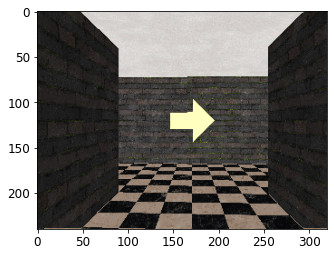

In [49]:
plt.imshow(observation)

## Set Position

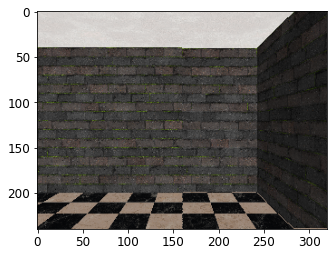

In [47]:
env.reset()
env.world.position(6.5, 3.5, 0)
observation = env.render(mode='rgb_array')
plt.imshow(observation)

## Moving

### Turn Left

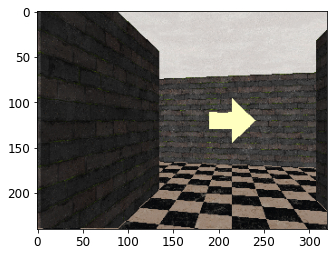

In [53]:
observation, reward, done, info = env.step(0)
plt.imshow(observation)

### Move Forward

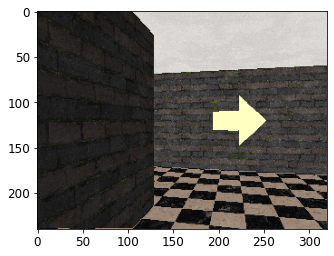

In [59]:
observation, reward, done, info = env.step(1)
plt.imshow(observation)

### Turn Right

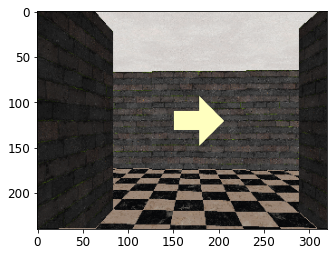

In [63]:
observation, reward, done, info = env.step(2)
plt.imshow(observation)

## Reset Environment

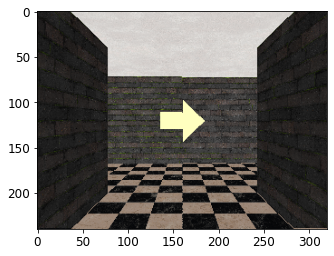

In [64]:
observation = env.reset()
plt.imshow(observation)

### Print Position

  Ended at position 3.5, 3.5


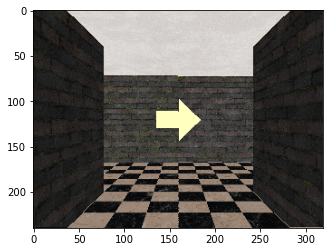

In [20]:
plt.imshow(observation)
print(f"  Ended at position {env.world.getX()}, {env.world.getY()}")

## List environment methods

In [25]:
dir(env.world)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'atGoal',
 'direction',
 'getDirX',
 'getDirY',
 'getTurnSpeed',
 'getWalkSpeed',
 'getX',
 'getY',
 'position',
 'render',
 'reset',
 'savePNG',
 'turn',
 'update',
 'walk']

In [117]:
dir(env.world.walk)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [146]:
?plt.imsave

In [4]:
def move_by(direction, episodes):
    """
    Save frames to forward, left, right directories
    direction (int): 0=left, 1=forward,2=right
    episodes (int): number of steps 
    """
    indx = 0
#     check if files exist    
    list_of_files = glob.glob('forward/*')
    if len(list_of_files) != 0:
        latest_file = max(list_of_files, key=os.path.getctime)
        print(latest_file)
#         If they do, keep incrementing file from latest written file name
        indx = int(latest_file[9:13]) + 1
#     Interate number of steps
    for i in range(episodes):
#         env.step(direction)
        observation, reward, done, info = env.step(direction)
        number = '{0:04}'.format(indx)
#         Save frame
        if direction == 1:
            plt.imsave("forward/f{}.png".format(number), observation)
        if direction == 2:
            plt.imsave("right/r{}.png".format(number), observation)
        if direction == 0:
            plt.imsave("left/l{}.png".format(number), observation)
        indx += 1

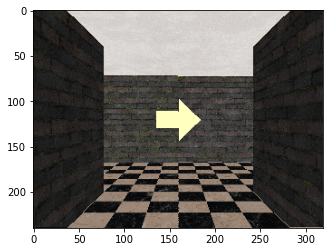

In [3]:
observation = env.reset()
plt.imshow(observation)

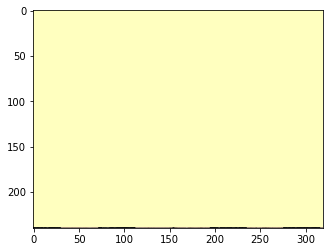

In [157]:
move_by(1, 100)
observation, reward, done, info = env.step(action)
plt.imshow(observation)

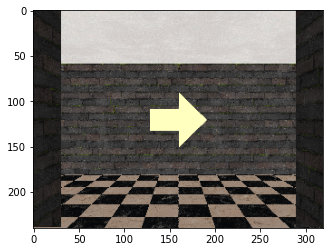

In [146]:
env.step(1)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
env.step(1)
observation, reward, done, info = env.step(1)
plt.imshow(observation)

In [158]:
dir(env.world)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'atGoal',
 'direction',
 'getDirX',
 'getDirY',
 'getTurnSpeed',
 'getWalkSpeed',
 'getX',
 'getY',
 'position',
 'render',
 'reset',
 'savePNG',
 'turn',
 'update',
 'walk']

In [162]:
dir(env.step)

['__call__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__func__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__self__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

# Collecting Data

Below is a code chunk that utilize the AutoGen.py, a program written by Jared, which automatically runs the game and saves the camera's images into three directories: left, right, and straight. 

- Do we care if the images are downloaded in sequential order?
- While running the AutoGen.py the robot gets stuck. That is, the program is running forever at a particular step in the directions. 
- maze.txt AutoGen run
	- looks like it gets stuck in last step? 
	- saved 5202 in straight, 318 in left, and 384 in right images on first run
	- AutoGen finished running after second run
		- 816 in straight, 155 in left, 228 in right
- new_maze.txt Autogen
    - finished running and added 585 images to straight, 101 to left, and 38 in right (i think that makes sense acutally because new_maze only had one WEST direction)??
- new_maze2.txt 
    - Looks like the robot gets stuck more easily. Maybe there's a way to graphically show this. Might need to adjust AutoGen ranomization
    
- new dataset build over weekend: 
    - saved about 4157 in straight, which has the most compared to left and right

In [7]:
# maze = sys.argv[1] if len(sys.argv) > 1 else "../Worlds/maze.txt"
# img_dir = sys.argv[2] if len(sys.argv) > 2 else None
maze = "../Worlds/maze.txt"
img_dir = "../Notebooks/data"
show_freq = 0

navigator = Navigator(maze, img_dir)

j = 0
while j < navigator.num_directions - 1:
    navigator.navigate(j, show_dir=True, show_freq=show_freq)
    j += 1

Directions: 1, 3, Dir.NORTH
Directions: 1, 5, Dir.NORTH
Directions: 1, 7, Dir.NORTH
Directions: 1, 9, Dir.EAST
Directions: 3, 9, Dir.NORTH
Directions: 3, 11, Dir.NORTH
Directions: 3, 13, Dir.NORTH
Directions: 3, 15, Dir.WEST
Directions: 1, 15, Dir.NORTH
Directions: 1, 17, Dir.EAST
Directions: 3, 17, Dir.EAST
Directions: 5, 17, Dir.SOUTH
Directions: 5, 15, Dir.EAST
Directions: 7, 15, Dir.EAST
Directions: 9, 15, Dir.NORTH
Directions: 9, 17, Dir.NORTH
Directions: 9, 19, Dir.EAST
Directions: 11, 19, Dir.EAST
Directions: 13, 19, Dir.EAST
Directions: 15, 19, Dir.EAST
Directions: 17, 19, Dir.EAST
Directions: 19, 19, Dir.EAST


In [30]:
from fastai.vision.all import *
from fastbook import *
import datetime;

In [10]:
dir_types = 'left','right','straight'
path = Path('../Notebooks/data')

In [11]:
if not path.exists():
    path.mkdir()
    for o in dir_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} data')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [12]:
path.ls()

(#3) [Path('../Notebooks/data/left'),Path('../Notebooks/data/right'),Path('../Notebooks/data/straight')]

In [13]:
lefts = (path/'left').ls().sorted()
rights = (path/'right').ls().sorted()
straights = (path/'straight').ls().sorted()

In [14]:
straights

(#786) [Path('../Notebooks/data/straight/00000.png'),Path('../Notebooks/data/straight/00001.png'),Path('../Notebooks/data/straight/00002.png'),Path('../Notebooks/data/straight/00003.png'),Path('../Notebooks/data/straight/00004.png'),Path('../Notebooks/data/straight/00005.png'),Path('../Notebooks/data/straight/00006.png'),Path('../Notebooks/data/straight/00007.png'),Path('../Notebooks/data/straight/00008.png'),Path('../Notebooks/data/straight/00009.png')...]

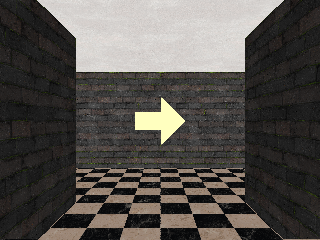

In [15]:
im3_path = straights[1]
im3 = Image.open(im3_path)
im3

# Model Building

In [16]:
movements = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [17]:
dls = movements.dataloaders(path)

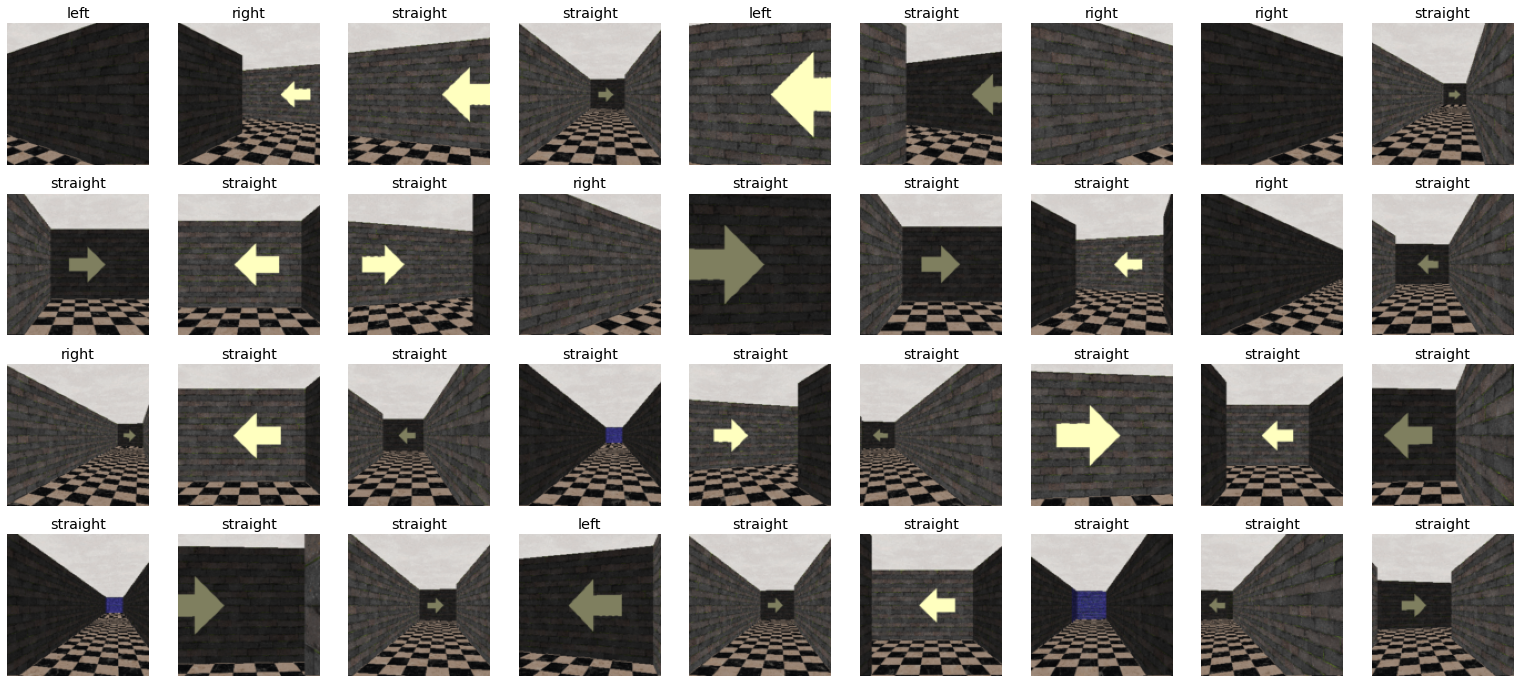

In [18]:
dls.valid.show_batch(max_n=36, nrows=4)

In [25]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.925516,0.482258,0.142552,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.479779,0.419150,0.116892,00:09
1,0.404469,0.288054,0.093371,00:09
2,0.328374,0.246250,0.084105,00:08
3,0.266439,0.228968,0.078403,00:09


In [19]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.521214,0.735350,0.255605,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.979251,0.502495,0.152466,00:03
1,0.809188,0.382083,0.107623,00:03
2,0.665162,0.254728,0.080717,00:03
3,0.583574,0.221002,0.076233,00:03


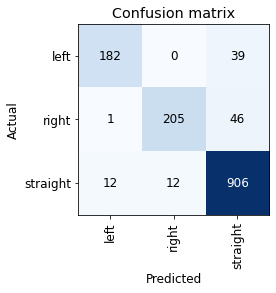

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

## Export the Model

In [20]:
learn.export()

In [21]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

## Apply Model

In [82]:
import sys

sys.path.append("../PycastWorld")
from gym_pycastworld.PycastWorldEnv import PycastWorldEnv  # type: ignore


steps_per_episode = 500

env = PycastWorldEnv()

# Run some number of trials all starting from the
# initial location. We might eventually randomize
# the maze and the starting location.

# Grab the initial observation (not used here)
observation = env.reset()
frames = [observation.copy()]
model_inf = load_learner(path/'export.pkl')

In [83]:
print("Predicting...")
for t in range(steps_per_episode):    
    
    # Remove this render call when actually training;
    # it will needlessly slow things down if you don't want
    # to watch.

    # Random action selection. This should be done in some
    # sort of "intelligent" manner.
    
    # Use a trained NN to select the action
    action_name, action_index, action_probs =  model_inf.predict(observation);
    print("action indx {} and action name {}".format(action_index, action_name));
    # map 2 to 1
    if action_index == 2:
        action_index = 1
    elif action_index == 1:
        action_index = 2

    # Advance the world one step. We could also have the step
    # method advance more than step so that it takes fewer
    # steps in total to get to the end goal.
    observation, reward, done, info = env.step(action_index)
    frames.append(observation.copy())
    
    # Check if we reached the end goal
    if done:
        print(f"  Found goal in {t+1} steps")
        break

print(f"  Ended at position {env.world.getX()}, {env.world.getY()}")
env.close();

# TODO: matplotlib animation
# replace plt.plot with plt show

# https://stable-baselines3.readthedocs.io/en/master/modules/dqn.html


Predicting...


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 1 and action name right


action indx 1 and action name right


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 2 and action name straight


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 1 and action name right


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 1 and action name right


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 1 and action name right


action indx 1 and action name right


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 2 and action name straight


action indx 2 and action name straight


action indx 1 and action name right


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 1 and action name right


action indx 1 and action name right


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 2 and action name straight


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 1 and action name right


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 1 and action name right


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 2 and action name straight


action indx 1 and action name right


action indx 2 and action name straight


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left


action indx 1 and action name right


action indx 0 and action name left
  Ended at position 3.079612704710335, 10.011711189544098


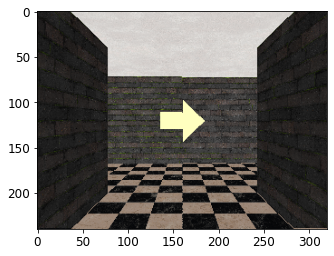

MovieWriter ffmpeg unavailable; using Pillow instead.


In [86]:
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
ln = plt.imshow(frames[0])
def init():
    ln.set_data(frames[0])
    return [ln]

def update(frame):
#     print(frame)
    ln.set_array(frame)
    return [ln]

ani = FuncAnimation(fig, update, frames, init_func=init, interval=60)
plt.show()
ani.save("prediction_" + str(datetime.datetime.now()) + ".gif")